# Exercise Sheet 10: *Clustering, Self Organizing Maps and Embedding*
Machine Intelligence 2<br>
SS 2017, Obermayer/Augustin/Guo<br>
due: **2017-07-12**<br>
Group: Outlaws (Muhammed Cengizhan Özmen, Zhanwang Chen, Sedat Koca, Huajun Li, Khaled Mansour)

<small>*Used Python version 2.7.11 (https://www.continuum.io/downloads, http://ipython.org/install.html)*</small>

In [1]:
import sys
print(sys.version)

2.7.13 |Anaconda 4.3.1 (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [2]:
# load frequently used libraries

import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

In [3]:
DRAW_RATE = 100
FEEDBACK  = True
SKIP_TASK_1 = False
SKIP_TASK_2 = True
SKIP_TASK_3 = True

## 10.1 *1d Self-Organizing Map for 2d data*

### a) Generate data

(2, 1000)


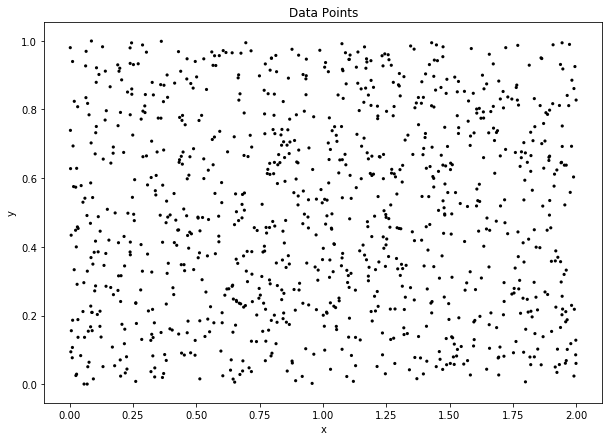

In [4]:
# data points
p = 1000

dataPoints = np.asarray([np.random.uniform(0,2,p), np.random.uniform(0,1,p)])
print dataPoints.shape

def plot2d(black=None, red=None, green=None, title="Data Points", file=None):
    fig = plt.figure(figsize=(10,7))
    if black is not None:
        plt.scatter(black[0], black[1], c='black', edgecolors='none', s=10)
    if red is not None:
        plt.scatter(red[0], red[1], c='r', edgecolors='none', s=80)
        plt.plot(red[0], red[1], c='r')
    if green is not None and file is None:
        plt.scatter(green[0], green[1], c='g', marker='x', s=80)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    if file is not None:
        plt.savefig(file, bbox_inches='tight')
    plt.show()
    
plot2d(dataPoints)

xMean = np.mean(dataPoints[0])
yMean = np.mean(dataPoints[1])
xStd = np.std(dataPoints[0])
yStd = np.std(dataPoints[1])

### b) + (c) Create one-dimensional self-organizing maps for different number of nodes (prototypes)

In [ ]:
# neighborhood function
def h(nearestPrototypeIndex, neighborhoodWidth, k):
    return np.exp( -np.divide(
        np.power(
            np.subtract(
                range(k),
                np.array([nearestPrototypeIndex] * k).T
            ),
            2
        ),
        2.0*np.power(neighborhoodWidth,2)
    ))

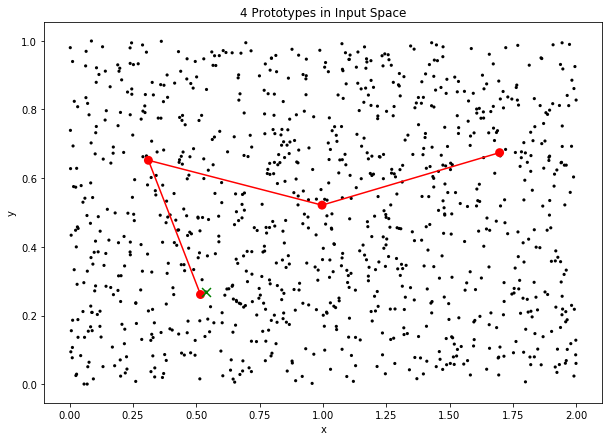

iteration: 1400
learningRate: 0.0992996759987
neighborhoodWidth: 0.00365656916956


In [ ]:
sizes = [4,8,16,32,64,128]
if SKIP_TASK_1:
    sizes = []
# create multipe maps with different number of nodes (prototypes)
for k in sizes:
    
    # annealing schedule
    learningRate = 0.2
    neighborhoodWidth = k/4.0
    learningRateFactor = 0.9995
    neighborhoodWidthFactor = 0.996
    stopLearningRate = 0.02 # stop if learningRate is smaller than this

    # init. prototypes
    prototypes = np.asarray([np.random.uniform(xMean-xStd, xMean+xStd, k),
                             np.random.uniform(yMean-yStd, yMean+yStd, k)])
    # show initializations
    display.clear_output(wait=True)
    plot2d(dataPoints, prototypes, title="Prototypes in Input Space")

    i = 0

    while True:
        # choose a data point
        x = dataPoints[:, i % (dataPoints.shape[1])]

        # find nearest prototypes
        distances = np.subtract(np.array([x] * k).T, prototypes)
        eucliDist = np.linalg.norm(distances, axis=0)
        nearestPrototypeIndex = np.argmin(eucliDist, axis=0)

        # move prototypes
        prototypes = np.add(
            prototypes,
            learningRate * h(nearestPrototypeIndex, neighborhoodWidth, k) * distances
        )

        # show prototypes in input space
        if i % DRAW_RATE == 0:
            display.clear_output(wait=True)
            plot2d(dataPoints, prototypes, x, str(k) + " Prototypes in Input Space")
            print "iteration:", i
            print "learningRate:", learningRate
            print "neighborhoodWidth:", neighborhoodWidth

        # break condition
        if learningRate < stopLearningRate:
            display.clear_output(wait=True)
            plot2d(dataPoints, prototypes, x, str(k) + " Prototypes in Input Space", file='fig/11.1_k='+str(k)+'.png')
            print "iteration:", i
            print "learningRate:", learningRate
            print "neighborhoodWidth:", neighborhoodWidth
            break
            
        # update
        i = i + 1
        learningRate = learningRate * learningRateFactor
        neighborhoodWidth = neighborhoodWidth * neighborhoodWidthFactor
    if FEEDBACK: 
        raw_input("Press ENTER to continue!")

### d) Final Maps

<!-- notice: images will be cached -->
<img src='fig/11.1_k=4.png'>
<img src='fig/11.1_k=8.png'>
<img src='fig/11.1_k=16.png'>
<img src='fig/11.1_k=32.png'>
<img src='fig/11.1_k=64.png'>
<img src='fig/11.1_k=128.png'>

## 10.2 *1d Self-Organizing Maps for 3d data*

### a) Load and visualize data

In [ ]:
spiraldata = np.genfromtxt('spiral.csv', delimiter=',', skip_header=1, usecols=(1,2,3)).T

# function that plots data points and prototypes in 3D and saves corresponding files
def plot3d(black=None, red=None, green=None, title="Data Points", file=None):
    fig = plt.figure(figsize=(10,10)).gca(projection='3d')
    if black is not None:
        fig.scatter(black[0], black[1], black[2], c='black', edgecolors='none', s=10)
    if red is not None:
        fig.scatter(red[0], red[1], red[2], c='r', edgecolors='none', s=80)
        fig.plot(red[0], red[1], red[2], c='r')
    if green is not None and file is None:
        fig.scatter(green[0], green[1], green[2], c='g', marker='x', s=80)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    if file is not None:
        plt.savefig(file, bbox_inches='tight')
    plt.show()
    
plot3d(spiraldata)

### b) + c) Adapt SOM to fit one-dimensional maps with different number of nodes (prototypes)

In [ ]:
sizes = [16,32,64,128]
if SKIP_TASK_2:
    sizes = []
# create multipe maps with different number of nodes (prototypes)
for k in sizes:
    
    # annealing schedule
    learningRate = 0.4
    neighborhoodWidth = k/4
    learningRateFactor = 0.998
    neighborhoodWidthFactor = 0.99
    stopLearningRate = 0.01 # stop if learningRate is smaller than this

    # initialize prototypes
    prototypes = np.asarray([np.zeros(k),
                             np.zeros(k),
                             np.linspace(0,5,k)])
    # show initializations
    display.clear_output(wait=True)
    plot3d(spiraldata, prototypes, title="Prototypes in Input Space")

    i = 0

    while True:
        # sample a data point
        x = spiraldata[:, int(np.random.uniform(1,spiraldata.shape[1],1))]
        
        # find nearest prototypes
        distances = np.subtract(np.array([x] * k).T, prototypes)
        eucliDist = np.linalg.norm(distances, axis=0)
        nearestPrototypeIndex = np.argmin(eucliDist, axis=0)

        # move prototypes
        prototypes = np.add(
            prototypes,
            learningRate * h(nearestPrototypeIndex, neighborhoodWidth, k) * distances
        )

        # show prototypes in input space
        if i % DRAW_RATE == 0:
            display.clear_output(wait=True)
            plot3d(spiraldata, prototypes, x, str(k) + " Prototypes in Input Space")
            print "iteration:", i
            print "learningRate:", learningRate
            print "neighborhoodWidth:", neighborhoodWidth

        # break condition
        if learningRate < stopLearningRate:
            display.clear_output(wait=True)
            plot3d(spiraldata, prototypes, x, str(k) + " Prototypes in Input Space", file='fig/11.2_k='+str(k)+'.png')
            print "iteration:", i
            print "learningRate:", learningRate
            print "neighborhoodWidth:", neighborhoodWidth
            break
            
        # update
        i = i + 1
        learningRate = learningRate * learningRateFactor
        neighborhoodWidth = neighborhoodWidth * neighborhoodWidthFactor
    if FEEDBACK: 
        raw_input("Press ENTER to continue!")

### d) Final Maps

<!-- notice: images will be cached -->
<img src='fig/11.2_k=16.png'>
<img src='fig/11.2_k=32.png'>
<img src='fig/11.2_k=64.png'>
<img src='fig/11.2_k=128.png'>

## 10.3 * 2d Self-Organizing Maps for 3d data*

### a) Load and visualize data

### b) + c) Adapt SOM to fit two-dimensional maps with different number of nodes (prototypes)